In [24]:
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, SimpleRNN, BatchNormalization, LSTM, Conv1D, Embedding, GRU, Conv2D, Dropout, MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D, Rescaling, Reshape
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau
#%pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.ndimage import zoom
import h5py
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.metrics import confusion_matrix

In [2]:
with open('time_series_1.pickle', 'rb') as handle:
    time_series_1 = pickle.load(handle)
with open('time_series_2.pickle', 'rb') as handle:
    time_series_2 = pickle.load(handle)
with open('y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [3]:
time_series_1

array([[30, 29, 29, ..., 36, 35, 50],
       [31, 31, 30, ..., 37, 32, 31],
       [28, 28, 28, ..., 40, 29, 38],
       ...,
       [28, 28, 28, ..., 38, 28, 36],
       [28, 28, 29, ..., 31, 36, 51],
       [31, 31, 30, ..., 35, 38, 24]], dtype=uint8)

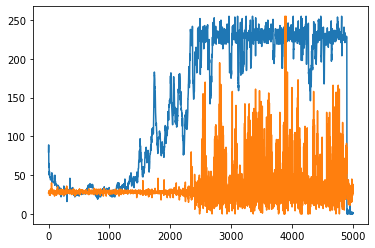

In [4]:
plt.plot(time_series_2[3])
plt.plot(time_series_1[3])

In [3]:
#preparing the dataset
#dstack
X=np.dstack((time_series_1,time_series_2))
y=y.reshape(4000,1)



In [4]:
#splitting
X_train, X_other, y_train, y_other = train_test_split(X, y , train_size=0.7, random_state=461,stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=391,stratify=y_other)


In [76]:
print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape,
X_valid.shape,
y_valid.shape)


(2800, 5000, 2) (2800, 1) (600, 5000, 2) (600, 1) (600, 5000, 2) (600, 1)


In [5]:
def train_plot(model, learning_rate = 0.001, epochs = 20):
    tf.keras.backend.clear_session()
    np.random.seed(312)
    tf.random.set_seed(312)
    model.compile(loss='SparseCategoricalCrossentropy',
                  optimizer=Adam(learning_rate = learning_rate),
                  metrics=['accuracy'])
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
    log = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_valid, y_valid),
                   callbacks = [early_stopping_cb])
    
   
    plt.plot(log.history['loss'],label = "training loss",color='darkgreen')
    plt.plot(log.history['val_loss'], label = "validation loss",color='darkblue')
    plt.plot(log.history['accuracy'],label = "training accuracy",color='grey')
    plt.plot(log.history['val_accuracy'], label = "validation accuracy",color='black')
    plt.legend()
    ax = plt.gca()
 
    ax.set_ylim([0, 1])
    plt.show()
    
    y_pred = model.predict(X_valid)
    
    return model

# Question 1 
Here sequence-to-vector SimpleRNN, LSTM, GRU, Conv1D - all with 20 neurons will be tried and then the best performing one will be tuned further. Sequence-to-vector approach is used because we are trying to eventually retrieve distinct classification probabilities for the 4 classes and not recreating another sequence.

## 1.1. Simple RNN 

In [9]:
modelSimple = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=[None, 2]),
    SimpleRNN(20),
    Dense(4, activation='softmax')
])

modelSimple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          460       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense (Dense)                (None, 4)                 84        
Total params: 1,364
Trainable params: 1,364
Non-trainable params: 0
_________________________________________________________________


2022-04-14 21:07:46.289501: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
88/88 [==============================] - 161s 2s/step - loss: 1.3857 - Accuracy: 0.2854 - val_loss: 1.3794 - val_Accuracy: 0.3567
Epoch 2/20
88/88 [==============================] - 149s 2s/step - loss: 1.3596 - Accuracy: 0.3089 - val_loss: 1.3307 - val_Accuracy: 0.3633
Epoch 3/20
88/88 [==============================] - 148s 2s/step - loss: 1.2567 - Accuracy: 0.4429 - val_loss: 1.1805 - val_Accuracy: 0.5433
Epoch 4/20
88/88 [==============================] - 149s 2s/step - loss: 1.1712 - Accuracy: 0.5007 - val_loss: 1.1043 - val_Accuracy: 0.5550
Epoch 5/20
88/88 [==============================] - 148s 2s/step - loss: 1.1124 - Accuracy: 0.5250 - val_loss: 1.0707 - val_Accuracy: 0.5717
Epoch 6/20
88/88 [==============================] - 148s 2s/step - loss: 1.0885 - Accuracy: 0.5246 - val_loss: 1.0675 - val_Accuracy: 0.5317
Epoch 7/20
88/88 [==============================] - 148s 2s/step - loss: 1.0417 - Accuracy: 0.5511 - val_loss: 1.0167 - val_Accuracy: 0.5667
Epoch 8/20
88

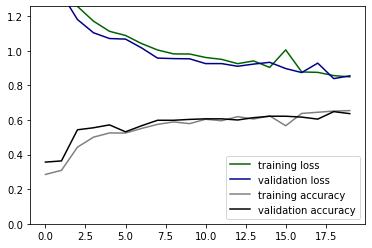

In [ ]:
train_plot(modelSimple, epochs=20)

Validation accuracy: 0.3637

## 1.2. LSTM

In [ ]:
modelLSTM = Sequential([
    LSTM(20, return_sequences=True, input_shape=[None, 2]),
    LSTM(20),
    Dense(4, activation='softmax')
])
modelLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 20)          1840      
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dense_5 (Dense)             (None, 4)                 84        
                                                                 
Total params: 5,204
Trainable params: 5,204
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
88/88 [==============================] - 243s 3s/step - loss: 1.3880 - Accuracy: 0.2564 - val_loss: 1.3905 - val_Accuracy: 0.2500
Epoch 2/20
88/88 [==============================] - 242s 3s/step - loss: 1.3845 - Accuracy: 0.2564 - val_loss: 1.3807 - val_Accuracy: 0.2617
Epoch 3/20
88/88 [==============================] - 242s 3s/step - loss: 1.3721 - Accuracy: 0.3132 - val_loss: 1.3600 - val_Accuracy: 0.3767
Epoch 4/20
88/88 [==============================] - 242s 3s/step - loss: 1.3519 - Accuracy: 0.3350 - val_loss: 1.3546 - val_Accuracy: 0.2667
Epoch 5/20
88/88 [==============================] - 241s 3s/step - loss: 1.3344 - Accuracy: 0.3454 - val_loss: 1.3347 - val_Accuracy: 0.3300
Epoch 6/20
88/88 [==============================] - 242s 3s/step - loss: 1.3229 - Accuracy: 0.3500 - val_loss: 1.3117 - val_Accuracy: 0.3950
Epoch 7/20
88/88 [==============================] - 242s 3s/step - loss: 1.3156 - Accuracy: 0.3554 - val_loss: 1.2993 - val_Accuracy: 0.4100
Epoch 8/20
88

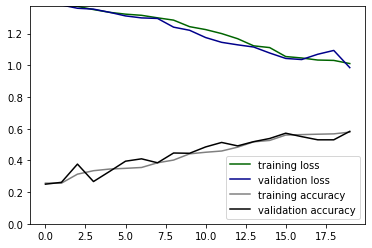

In [ ]:
train_plot(modelLSTM,epochs=20)

Validation Accuracy: 0.5833

## 1.3. GRU

In [ ]:
modelGRU = Sequential([
    GRU(20, return_sequences=True, input_shape=[None, 2]),
    GRU(20),
    Dense(4, activation='softmax')
])
modelGRU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 20)          1440      
                                                                 
 gru_1 (GRU)                 (None, 20)                2520      
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
Total params: 4,044
Trainable params: 4,044
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
88/88 [==============================] - 257s 3s/step - loss: 1.3733 - Accuracy: 0.2914 - val_loss: 1.3374 - val_Accuracy: 0.3550
Epoch 2/20
88/88 [==============================] - 255s 3s/step - loss: 1.2684 - Accuracy: 0.4239 - val_loss: 1.2369 - val_Accuracy: 0.4400
Epoch 3/20
88/88 [==============================] - 256s 3s/step - loss: 1.2027 - Accuracy: 0.4854 - val_loss: 1.1799 - val_Accuracy: 0.5083
Epoch 4/20
88/88 [==============================] - 255s 3s/step - loss: 1.1556 - Accuracy: 0.5207 - val_loss: 1.1467 - val_Accuracy: 0.5283
Epoch 5/20
88/88 [==============================] - 255s 3s/step - loss: 1.1168 - Accuracy: 0.5564 - val_loss: 1.1419 - val_Accuracy: 0.5367
Epoch 6/20
88/88 [==============================] - 255s 3s/step - loss: 1.0835 - Accuracy: 0.5661 - val_loss: 1.0740 - val_Accuracy: 0.5733
Epoch 7/20
88/88 [==============================] - 286s 3s/step - loss: 1.0632 - Accuracy: 0.5686 - val_loss: 1.0757 - val_Accuracy: 0.5633
Epoch 8/20
88

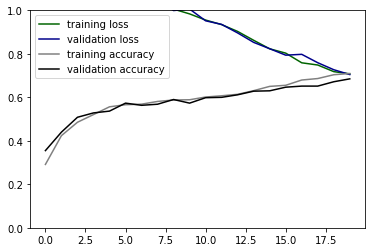

In [ ]:
train_plot(modelGRU,epochs=20)

Validation Accuracy: 0.685

## 1.4. Conv1D

In [19]:
modelConv1D = Sequential([
    Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",input_shape=[None, 2]),
    GRU(20),
    Dense(4, activation='softmax')
])
modelConv1D.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 20)          180       
_________________________________________________________________
gru (GRU)                    (None, 20)                2520      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 84        
Total params: 2,784
Trainable params: 2,784
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
88/88 [==============================] - 54s 608ms/step - loss: 1.7430 - accuracy: 0.2014 - val_loss: 1.3881 - val_accuracy: 0.1500
Epoch 2/20
88/88 [==============================] - 53s 603ms/step - loss: 1.3851 - accuracy: 0.2508 - val_loss: 1.3688 - val_accuracy: 0.2600
Epoch 3/20
88/88 [==============================] - 52s 597ms/step - loss: 1.3577 - accuracy: 0.3045 - val_loss: 1.2916 - val_accuracy: 0.3483
Epoch 4/20
88/88 [==============================] - 53s 604ms/step - loss: 1.2877 - accuracy: 0.3927 - val_loss: 1.2309 - val_accuracy: 0.4367
Epoch 5/20
88/88 [==============================] - 54s 618ms/step - loss: 1.2345 - accuracy: 0.4273 - val_loss: 1.1570 - val_accuracy: 0.5333
Epoch 6/20
88/88 [==============================] - 66s 745ms/step - loss: 1.1593 - accuracy: 0.5063 - val_loss: 1.0681 - val_accuracy: 0.5683
Epoch 7/20
88/88 [==============================] - 71s 806ms/step - loss: 1.1154 - accuracy: 0.5275 - val_loss: 1.0250 - val_accuracy: 0.5750

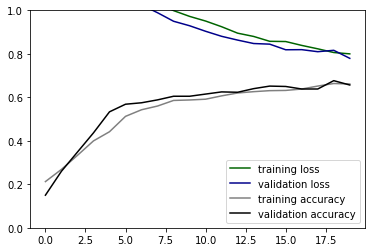

In [20]:
train_plot(modelConv1D)

Validation Accuracy: 0.6567

So far Conv1D and GRU have been the best performing models but Conv1D is computationally the most efficient of all. Therefore, we will further improve and tune this model to increase the accuracy.

## 1.5. Conv1D Improved

In [ ]:
modelConv1D_1 = Sequential([
    Conv1D(filters=20, kernel_size=4, strides=2, padding="same",input_shape=[None, 2]),
    GRU(64, return_sequences=True),
    GRU(64),
    Dense(4, activation='softmax')
])
modelConv1D_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 20)          180       
                                                                 
 gru (GRU)                   (None, None, 64)          16512     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 41,912
Trainable params: 41,912
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
88/88 [==============================] - 125s 1s/step - loss: 1.2609 - Accuracy: 0.4236 - val_loss: 1.1202 - val_Accuracy: 0.5333
Epoch 2/20
88/88 [==============================] - 122s 1s/step - loss: 1.0186 - Accuracy: 0.5625 - val_loss: 0.9012 - val_Accuracy: 0.5867
Epoch 3/20
88/88 [==============================] - 122s 1s/step - loss: 0.8258 - Accuracy: 0.6500 - val_loss: 0.6977 - val_Accuracy: 0.7133
Epoch 4/20
88/88 [==============================] - 122s 1s/step - loss: 0.6858 - Accuracy: 0.7171 - val_loss: 0.5952 - val_Accuracy: 0.7467
Epoch 5/20
88/88 [==============================] - 122s 1s/step - loss: 0.5695 - Accuracy: 0.7671 - val_loss: 0.4763 - val_Accuracy: 0.8333
Epoch 6/20
88/88 [==============================] - 131s 1s/step - loss: 0.4878 - Accuracy: 0.8082 - val_loss: 0.4972 - val_Accuracy: 0.8017
Epoch 7/20
88/88 [==============================] - 131s 1s/step - loss: 0.4572 - Accuracy: 0.8164 - val_loss: 0.3943 - val_Accuracy: 0.8567
Epoch 8/20
88

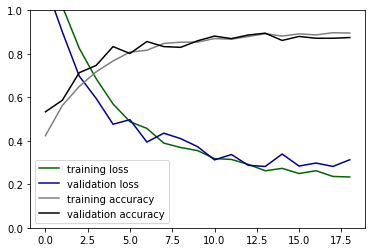

In [ ]:
train_plot(modelConv1D_1,epochs=20)

Validation Accuracy: 0.875

We can tune the model futher using keras tuner to get the best hyperparameters for this architecture.

## 1.6. Tuning Conv1D

In [ ]:
import keras_tuner as kt

In [ ]:
def train_Conv1D(hp):    
    num_filters=hp.Int('num_filters', min_value=10, max_value=100, step=10)
    kernels = hp.Int('kernels', min_value=3, max_value=6)
    num_strides = hp.Int('num_strides', min_value=1, max_value=4)
    #num_units = hp.Int('num_units', min_value = 20, max_value=80, step=20)
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value=1, sampling='log') 

    model = Sequential([
                  Conv1D(filters=num_filters, kernel_size=kernels, strides=num_strides, padding="valid",input_shape=[None, 2]),
                  GRU(units=64, return_sequences=True),
                  GRU(units=64),
                  Dense(4, activation='softmax')
                  ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    np.random.seed(312)
    tf.random.set_seed(312)

    model.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = learning_rate),
                  metrics=['accuracy'])


    
    return model

In [ ]:
rm -rf ./logs/ADL_tuning

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
lr_red_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=1e-6)
tuner = kt.Hyperband(train_Conv1D,
                     objective='val_loss',
                     max_epochs=20,
                     factor=3,
                     directory='logs',
                     project_name='ADL_tuning')
tuner.search(X_train, y_train, validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb,lr_red_callback])

Trial 30 Complete [01h 28m 53s]
val_loss: 0.4312611520290375

Best val_loss So Far: 0.3714412450790405
Total elapsed time: 09h 01m 47s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print(' filters =',best_hps['num_filters'], '\n',
'kernels =', best_hps['kernels'], '\n',
'strides =', best_hps['num_strides'], '\n',
'learning rate =', best_hps['learning_rate'], '\n'
)
Conv1Dtuned = tuner.hypermodel.build(best_hps)

 filters = 80 
 kernels = 5 
 strides = 4 
 learning rate = 0.0010099476649023486 



In [ ]:
Conv1Dtuned = Sequential([
                  Conv1D(filters=80, kernel_size=5, strides=4, padding="valid",input_shape=[None, 2]),
                  GRU(units=64, return_sequences=True),
                  GRU(units=64),
                  Dense(4, activation='softmax')
                  ])

Epoch 1/20
88/88 [==============================] - 64s 706ms/step - loss: 1.3271 - Accuracy: 0.3514 - val_loss: 1.1535 - val_Accuracy: 0.4900
Epoch 2/20
88/88 [==============================] - 62s 705ms/step - loss: 1.0603 - Accuracy: 0.5361 - val_loss: 0.8516 - val_Accuracy: 0.6567
Epoch 3/20
88/88 [==============================] - 61s 699ms/step - loss: 0.7804 - Accuracy: 0.6875 - val_loss: 0.6820 - val_Accuracy: 0.7167
Epoch 4/20
88/88 [==============================] - 61s 699ms/step - loss: 0.5674 - Accuracy: 0.7800 - val_loss: 0.5015 - val_Accuracy: 0.7800
Epoch 5/20
88/88 [==============================] - 61s 694ms/step - loss: 0.4608 - Accuracy: 0.8261 - val_loss: 0.4260 - val_Accuracy: 0.8283
Epoch 6/20
88/88 [==============================] - 62s 704ms/step - loss: 0.3837 - Accuracy: 0.8507 - val_loss: 0.3834 - val_Accuracy: 0.8367
Epoch 7/20
88/88 [==============================] - 62s 705ms/step - loss: 0.3736 - Accuracy: 0.8493 - val_loss: 0.4743 - val_Accuracy: 0.7850

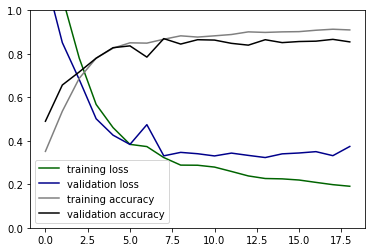

In [ ]:
train_plot(Conv1Dtuned,learning_rate=0.0010099476649023486)

High variance here - normalisation/regularisation needed: Using Dropout layers

In [ ]:
Conv1Dtuned_1 = Sequential([
                  Conv1D(filters=80, kernel_size=5, strides=4, padding="valid",input_shape=[None, 2]),
                  BatchNormalization(),
                  GRU(units=64, return_sequences=True),
                  Dropout(0.2),
                  BatchNormalization(),
                  GRU(units=64),
                  Dropout(0.1),
                  Dense(4, activation='softmax')
                  ])

Epoch 1/25
88/88 [==============================] - 87s 956ms/step - loss: 1.4253 - Accuracy: 0.2661 - val_loss: 1.3453 - val_Accuracy: 0.3400
Epoch 2/25
88/88 [==============================] - 78s 887ms/step - loss: 1.2877 - Accuracy: 0.3936 - val_loss: 1.1354 - val_Accuracy: 0.4967
Epoch 3/25
88/88 [==============================] - 68s 769ms/step - loss: 0.9914 - Accuracy: 0.5868 - val_loss: 1.0137 - val_Accuracy: 0.5700
Epoch 4/25
88/88 [==============================] - 61s 698ms/step - loss: 0.6510 - Accuracy: 0.7314 - val_loss: 0.7457 - val_Accuracy: 0.6833
Epoch 5/25
88/88 [==============================] - 62s 700ms/step - loss: 0.4836 - Accuracy: 0.7971 - val_loss: 0.4516 - val_Accuracy: 0.8267
Epoch 6/25
88/88 [==============================] - 62s 700ms/step - loss: 0.3915 - Accuracy: 0.8443 - val_loss: 0.4044 - val_Accuracy: 0.8333
Epoch 7/25
88/88 [==============================] - 61s 699ms/step - loss: 0.3215 - Accuracy: 0.8625 - val_loss: 0.3001 - val_Accuracy: 0.8833

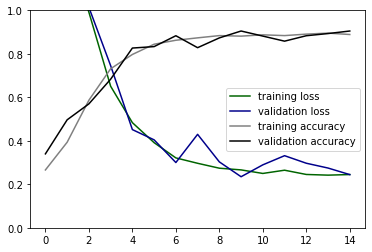

In [ ]:
train_plot(Conv1Dtuned_1,learning_rate=0.0010099476649023486, epochs=25)

The losses were deflecting away initially and to fix that dropout layers were used. Then, the validation loss was fluctuating too much, so using batch normalisation ensured better convergance.

## 1.7. RNN Accuracy 




Validation Accuracy: 0.905

Conv1Dtuned_1 is the final RNN structure.


# Question 2

Time-series data is characterised by a relation between neighbouring data points, for example, a particular pitch angle may affect the position at the next time stamp. When converted into images, and placed together, the high-level features of these observations are extracted by multiple convulations simultaneously. This ability of capturing nuances between the components of in image makes CNN effective in time-series classification. 

Although RNNs can also recognise these associations, they do so finely as data comes feature by feature; if there is anything missing in a time-window, RNNs will find it difficult to recognise the complete pattern. With a CNN, there is a better scope to grasp the patterns in a broader sense as the convolutions span around the image. 

Lastly, CNNs are computationally more effective and can learn patterns simultaneously, whereas RNNs work in linear chained form but can be good with longer trails of information.

# Question 3: 
### 3.1. Converting the data to be used with CNN
The idea is to convert each time series of length 5000 into a 100X50 matrix. Then, sticking the two matrices together column-wise to get a 100X100X1 matrix. The process will be repeated for each of the 4000 turbine runs and each of the 4000 resulting images will be representing the pitch angle and the generator torque readings (half the image for each). The combined image properties will be different for each class and hopefully CNN filters will be able to extract these nuances in the images. 

(100, 100, 1)


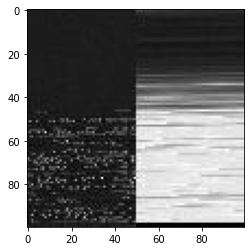

In [6]:
# Trying a single observation
img0=np.hstack((time_series_1[0].reshape(100,50),time_series_2[0].reshape(100,50))).reshape(100,100,1)
print(img0.shape)
plt.imshow(img0.reshape(100,100),cmap='gray')

In [7]:
#iterating over all the 4000 runs
images=[np.hstack((time_series_1[i].reshape(100,50),time_series_2[i].reshape(100,50))).reshape(100,100,1) for i in range(len(time_series_1))]

In [8]:
#repeating the above process on the train, test, and validation sets but first retrieveing the individual time series by splitting the previously combined 3D matrix for RNN.
#this is done to ensure that all 3 sets have the same observations for RNN and CNN
train1 = np.dsplit(X_train,2)[0].reshape(2800,5000)
test1 = np.dsplit(X_test,2)[0].reshape(600,5000)
valid1 = np.dsplit(X_valid,2)[0].reshape(600,5000)


In [9]:
train2 = np.dsplit(X_train,2)[1].reshape(2800,5000)
test2 = np.dsplit(X_test,2)[1].reshape(600,5000)
valid2 = np.dsplit(X_valid,2)[1].reshape(600,5000)


In [10]:
images_train=np.array([np.hstack((train1[i].reshape(100,50),train2[i].reshape(100,50))).reshape(100,100,1) for i in range(len(train1))])
images_test=np.array([np.hstack((test1[i].reshape(100,50),test2[i].reshape(100,50))).reshape(100,100,1) for i in range(len(test1))])
images_valid=np.array([np.hstack((valid1[i].reshape(100,50),valid2[i].reshape(100,50))).reshape(100,100,1) for i in range(len(valid1))])

In [14]:
y_train[0:10]

array([[1.],
       [2.],
       [0.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [2.],
       [3.]])

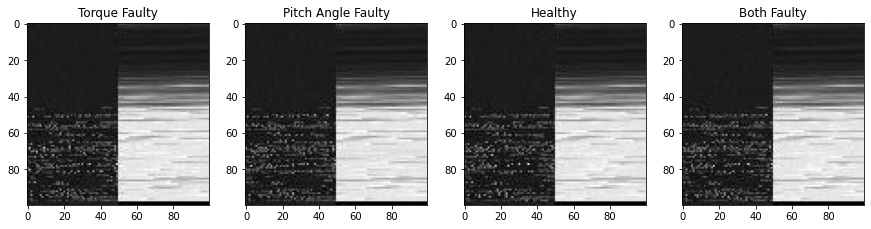

In [11]:
plt.figure(figsize=(15,20))
titles=['Torque Faulty', 'Pitch Angle Faulty', 'Healthy', 'Both Faulty']
for i in range(4):
    ax= plt.subplot(1,4,i+1)
    plt.imshow(images_train[i].reshape(100,100),cmap='gray')
    plt.title(titles[i])

# Question 4
Replicating the CNN with 3 convulational layers, 32 filters, 3X3 kernel, a 20% Dropout layer, and a MaxPooling layer of size 3X3


In [ ]:
modelCNN = Sequential([
Conv2D(32,kernel_size=3, input_shape=(100,100,1)),
Conv2D(32,kernel_size=3),
Dropout(0.2),
Conv2D(16,kernel_size=3,activation='relu'),
MaxPooling2D(pool_size=3),
Flatten(),
Dense(4,activation='softmax')
])
#no strides and padding
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 96, 96, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                        

In [16]:
def train_plot_CNN(model, learning_rate = 0.001, epochs = 20):
    tf.keras.backend.clear_session()
    np.random.seed(312)
    tf.random.set_seed(312)

    model.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = learning_rate),
                  metrics=['accuracy'])
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)
    lr_red_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=1e-6)
    log = model.fit(images_train, y_train, epochs=epochs,
                        validation_data=(images_valid, y_valid),
                   callbacks = [lr_red_callback])
    
    plt.plot(log.history['loss'],label = "training loss",color='darkgreen')
    plt.plot(log.history['val_loss'], label = "validation loss",color='darkblue')
    plt.plot(log.history['accuracy'],label = "training accuracy",color='grey')
    plt.plot(log.history['val_accuracy'], label = "validation accuracy",color='black')
    plt.legend()
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    
    return model

Epoch 1/20
88/88 [==============================] - 25s 285ms/step - loss: 0.2695 - Accuracy: 0.8782 - val_loss: 0.2321 - val_Accuracy: 0.9000
Epoch 2/20
88/88 [==============================] - 25s 284ms/step - loss: 0.2582 - Accuracy: 0.8832 - val_loss: 0.2410 - val_Accuracy: 0.9033
Epoch 3/20
88/88 [==============================] - 25s 287ms/step - loss: 0.2787 - Accuracy: 0.8811 - val_loss: 0.2320 - val_Accuracy: 0.9017
Epoch 4/20
88/88 [==============================] - 25s 289ms/step - loss: 0.2529 - Accuracy: 0.8829 - val_loss: 0.2369 - val_Accuracy: 0.8933
Epoch 5/20
88/88 [==============================] - 27s 304ms/step - loss: 0.2376 - Accuracy: 0.8896 - val_loss: 0.2304 - val_Accuracy: 0.9083
Epoch 6/20
88/88 [==============================] - 25s 283ms/step - loss: 0.2514 - Accuracy: 0.8879 - val_loss: 0.2282 - val_Accuracy: 0.9067
Epoch 7/20
88/88 [==============================] - 25s 284ms/step - loss: 0.2601 - Accuracy: 0.8818 - val_loss: 0.2669 - val_Accuracy: 0.9033

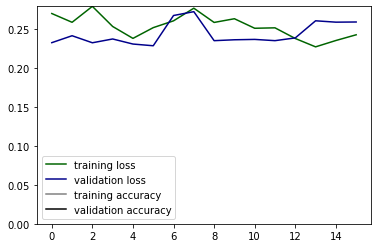

In [ ]:
train_plot_CNN(modelCNN)

### 4.1. Accuracy
Validation: 0.8983 | Training: 0.8886

# Question 5 





### 5.1. Hyperparameter Tuning of the CNN using Keras Tuner

In [ ]:
#HP tuning  
def train_CNN(hp):    
    num_filters=hp.Int('num_filters', min_value=16, max_value=128, step=16)
    kernels = hp.Int('kernels', min_value=3, max_value=8)
    num_strides = hp.Int('num_strides', min_value=1, max_value=2)
    learning_rate = hp.Float('learning_rate', min_value = 0.0001, max_value=1, sampling='log') 
    paddings = hp.Choice('paddings',values=['same','valid'])
    dropout_rate = hp.Float('dropout_rate',min_value=0, max_value=0.5, step=0.1)
    max_pooling = hp.Int('pooling', min_value=3, max_value=6)
    #avg_pooling = hp.Int('pooling', min_value=1, max_value=6)


    model = Sequential([       
                Conv2D(filters=num_filters,kernel_size=kernels, padding=paddings, strides=num_strides, input_shape=(100,100,1)),
                Conv2D(filters=num_filters,kernel_size=kernels,padding=paddings, strides=num_strides),
                Dropout(rate=dropout_rate),
                Conv2D(filters=num_filters,kernel_size=kernels,padding=paddings,strides=num_strides,activation='relu'),
                MaxPooling2D(pool_size=(3,3)),#padding=paddings,strides=num_strides),
                Flatten(),
                Dense(4,activation='softmax')
                ])

    np.random.seed(312)
    tf.random.set_seed(312)

    model.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = learning_rate),
                  metrics=['accuracy'])


    
    return model

In [ ]:
rm -rf ./logs/ADL_tuning1

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
lr_red_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=1e-6)
tuner = kt.Hyperband(train_CNN,
                     objective='val_loss',
                     max_epochs=20,
                     factor=3,
                     directory='logs',
                     project_name='ADL_tuning1')
tuner.search(images_train, y_train, validation_data=(images_valid,y_valid),callbacks=[lr_red_callback])

INFO:tensorflow:Reloading Oracle from existing project logs/ADL_tuning1/oracle.json
INFO:tensorflow:Reloading Tuner from logs/ADL_tuning1/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print(' filters =',best_hps['num_filters'], '\n',
'kernels =', best_hps['kernels'], '\n',
'strides =', best_hps['num_strides'], '\n',
'learning rate =', best_hps['learning_rate'], '\n',
'paddings =', best_hps['paddings'], '\n',
'dropout rate =', best_hps['dropout_rate'],
)
CNNtuned = tuner.hypermodel.build(best_hps)

 filters = 80 
 kernels = 5 
 strides = 2 
 learning rate = 0.00017829281835005561 
 paddings = same 
 dropout rate = 0.2


Epoch 1/100
88/88 [==============================] - 2s 19ms/step - loss: 1.0442 - Accuracy: 0.6575 - val_loss: 0.2608 - val_Accuracy: 0.9033 - lr: 0.0010
Epoch 2/100
88/88 [==============================] - 1s 17ms/step - loss: 0.3040 - Accuracy: 0.8804 - val_loss: 0.2280 - val_Accuracy: 0.9067 - lr: 0.0010
Epoch 3/100
85/88 [===========================>..] - ETA: 0s - loss: 0.4279 - Accuracy: 0.8434
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
88/88 [==============================] - 1s 16ms/step - loss: 0.4207 - Accuracy: 0.8464 - val_loss: 0.2295 - val_Accuracy: 0.9067 - lr: 0.0010
Epoch 4/100
88/88 [==============================] - 1s 17ms/step - loss: 0.2701 - Accuracy: 0.8889 - val_loss: 0.2222 - val_Accuracy: 0.9067 - lr: 3.0000e-04
Epoch 5/100
88/88 [==============================] - 1s 16ms/step - loss: 0.2579 - Accuracy: 0.8914 - val_loss: 0.2452 - val_Accuracy: 0.8900 - lr: 3.0000e-04
Epoch 6/100
88/88 [==============================] - 1s 17

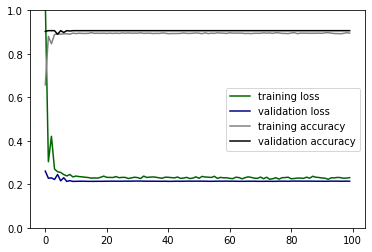

In [ ]:
train_plot_CNN(CNNtuned,epochs=100)

### 5.2. Image Preprocessing and Data Augmentation

Adding these layers to have the expected image values go into the model and to explore if the gap between the losses can be reduced. 

In [ ]:
modelTRY = Sequential([ 
                Rescaling(scale=1/127.5,offset=-1),   
                tf.keras.layers.RandomFlip(),          
                Conv2D(filters=80,kernel_size=5, padding='same', strides=2, input_shape=(100,100,1)),
               
                Conv2D(filters=80,kernel_size=5,padding='same', strides=2),
                Dropout(rate=0.2),
            
                Conv2D(filters=80,kernel_size=5,padding='same',strides=2,activation='relu'),
                MaxPooling2D(pool_size=(3,3)),#padding=paddings,strides=num_strides),
                Flatten(),
                Dense(4,activation='softmax')
                ])

Epoch 1/50
88/88 [==============================] - 3s 20ms/step - loss: 1.3354 - Accuracy: 0.3664 - val_loss: 1.0967 - val_Accuracy: 0.5750 - lr: 0.0010
Epoch 2/50
88/88 [==============================] - 2s 18ms/step - loss: 0.7153 - Accuracy: 0.7836 - val_loss: 0.3091 - val_Accuracy: 0.9050 - lr: 0.0010
Epoch 3/50
87/88 [============================>.] - ETA: 0s - loss: 0.3536 - Accuracy: 0.8693
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
88/88 [==============================] - 2s 18ms/step - loss: 0.3529 - Accuracy: 0.8696 - val_loss: 0.2770 - val_Accuracy: 0.9033 - lr: 0.0010
Epoch 4/50
88/88 [==============================] - 2s 18ms/step - loss: 0.2680 - Accuracy: 0.8811 - val_loss: 0.2457 - val_Accuracy: 0.9033 - lr: 3.0000e-04
Epoch 5/50
87/88 [============================>.] - ETA: 0s - loss: 0.2542 - Accuracy: 0.8840
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
88/88 [==============================] - 2s 18ms/st

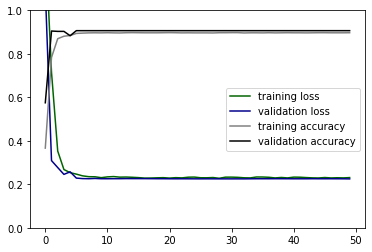

In [ ]:
train_plot_CNN(modelTRY,epochs=50)

The losses did converge more but both the losses and accuracies kind of plateaus, which means the model is not learning even using 30 epochs. The training and validation accuracies move very closely together, therefore, the tuned parameters with the existing architecture appear quite effective. However, in order to obtain a higher accuracy, new network architectures may need to be explored building on to the tuned model. We will add  more depth to the network and create a learning rate schedule to prevent slow learning. 

### 5.3. Learning Rate Scheduler and Increasing Depth

In [ ]:
# This function keeps the initial learning rate for the first ten epochs
 # and decreases it exponentially after that.
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.01)

modelTRY_1 = Sequential([ 
                Rescaling(scale=1/127.5,offset=-1),   
                tf.keras.layers.RandomFlip(),          
                Conv2D(filters=80,kernel_size=5, padding='same', strides=2, input_shape=(100,100,1)),
               
                Conv2D(filters=80,kernel_size=5,padding='same', strides=2),
                Dropout(rate=0.2),
            
                Conv2D(filters=96,kernel_size=3,padding='same',strides=2,activation='linear'),
                MaxPooling2D(pool_size=(3,3)),#padding=paddings,strides=num_strides),
                
                Conv2D(filters=112,kernel_size=3,padding='valid',strides=1,activation='relu'),
                Dropout(rate=0.2),

                Conv2D(filters=160,kernel_size=3,padding='same',strides=1,activation='relu'),

                MaxPooling2D(pool_size=(2,2)),

                Flatten(),
                Dense(4,activation='softmax')
                ])

def train_plot_CNN(model, learning_rate = 0.001, epochs = 20):
    tf.keras.backend.clear_session()
    np.random.seed(312)
    tf.random.set_seed(312)

    model.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = learning_rate),
                  metrics=['accuracy'])
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)
    lr_red_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=1e-6)
    lr_schedule_callback = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

    log = model.fit(images_train, y_train, epochs=epochs,
                        validation_data=(images_valid, y_valid),
                   callbacks = [lr_schedule_callback,])
    
    plt.plot(log.history['loss'],label = "training loss",color='darkgreen')
    plt.plot(log.history['val_loss'], label = "validation loss",color='darkblue')
    plt.plot(log.history['accuracy'],label = "training accuracy",color='grey')
    plt.plot(log.history['val_accuracy'], label = "validation accuracy",color='black')
    plt.legend()
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    
    return model



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
88/88 [==============================] - 60s 667ms/step - loss: 1.3965 - Accuracy: 0.2486 - val_loss: 1.3861 - val_Accuracy: 0.2500 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
88/88 [==============================] - 56s 639ms/step - loss: 1.3886 - Accuracy: 0.2493 - val_loss: 1.3849 - val_Accuracy: 0.2567 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
88/88 [==============================] - 55s 624ms/step - loss: 1.3883 - Accuracy: 0.2489 - val_loss: 1.3845 - val_Accuracy: 0.2500 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
88/88 [==============================] - 55s 627ms/step - loss: 1.3689 - Accuracy: 0.2932 - val_loss: 1.2843 - val_Accuracy: 0.5350 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to

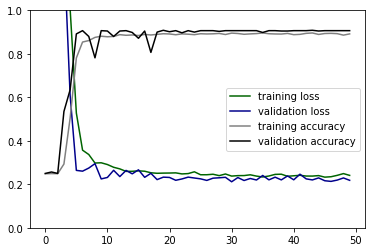

In [ ]:
train_plot_CNN(modelTRY_1,epochs=50)

The accuracy has been stuck at 0.9067 and the validation loss moves very slw;y after the 10th epoch, throughout the execution of the 50 epochs. Exploring how using mini-batch might speed up the training. 

### 5.4. Mini-batch (size=64)

In [ ]:
# This function keeps the initial learning rate for the first ten epochs
 # and decreases it exponentially after that.

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

modelTRY_2 = Sequential([ 
                Rescaling(scale=1/127.5,offset=-1),   
                Conv2D(filters=80,kernel_size=5, padding='same', strides=2, input_shape=(100,100,1)),

                tf.keras.layers.RandomFlip(),
                Conv2D(filters=80,kernel_size=5,padding='same', strides=2),
                Dropout(rate=0.2),
                
                
                Conv2D(filters=96,kernel_size=3,padding='same',strides=2,activation='linear'),
                MaxPooling2D(pool_size=(3,3)),

                Conv2D(filters=112,kernel_size=3,padding='valid',strides=1,activation='relu'),
                Dropout(rate=0.2),

                Conv2D(filters=160,kernel_size=3,padding='same',strides=1,activation='relu'),

                Flatten(),
                Dense(4,activation='softmax')
                ])

def train_plot_CNN(model, learning_rate = 0.001, epochs = 20):
    tf.keras.backend.clear_session()
    np.random.seed(312)
    tf.random.set_seed(312)

    model.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = learning_rate),
                  metrics=['accuracy'])
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)
    lr_red_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=1e-6)
    lr_schedule_callback = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

    log = model.fit(images_train, y_train, epochs=epochs,
                        validation_data=(images_valid, y_valid),
                   callbacks = [lr_schedule_callback,],
                    batch_size=64)
    
    plt.plot(log.history['loss'],label = "training loss",color='darkgreen')
    plt.plot(log.history['val_loss'], label = "validation loss",color='darkblue')
    plt.plot(log.history['accuracy'],label = "training accuracy",color='grey')
    plt.plot(log.history['val_accuracy'], label = "validation accuracy",color='black')
    plt.legend()
    ax = plt.gca()
    ax.set_ylim([0, 1])
    plt.show()
    
    return model




Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/30
44/44 [==============================] - 19s 423ms/step - loss: 1.3933 - Accuracy: 0.2496 - val_loss: 1.3903 - val_Accuracy: 0.4367 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/30
44/44 [==============================] - 18s 419ms/step - loss: 1.3848 - Accuracy: 0.2743 - val_loss: 1.3810 - val_Accuracy: 0.2500 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/30
44/44 [==============================] - 18s 415ms/step - loss: 1.3590 - Accuracy: 0.3289 - val_loss: 1.1825 - val_Accuracy: 0.5667 - lr: 0.0010

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/30
44/44 [==============================] - 18s 413ms/step - loss: 0.8986 - Accuracy: 0.6271 - val_loss: 0.4456 - val_Accuracy: 0.8717 - lr: 0.0010

Epoch 00005: LearningRateScheduler sett

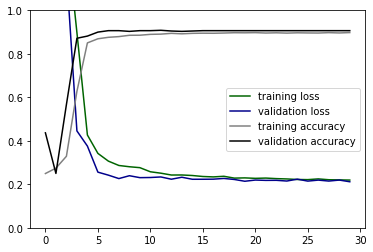

In [ ]:
tf.keras.backend.clear_session()
train_plot_CNN(modelTRY_2,epochs=30)

 With mini-batch, the losses seem to converge after 22nd epoch, but again accuracies plateau. There does not seem to be an issue of high variance but there may be bias and the model can use more learning. The gradients are also in check as there are not any fluctuations in the loss movement and since there is a learning rate schedule in place. 
 
 Scaling initial data to -1 and 1 has been tried and even augmentation has not helped. In order to help training further, more layers are needed to increase the capacity of the model. For this reason, Transfer Learning will be explored to assess performance of deeper CNNs for our image recognition task. Batch Normalisation was also tried during this iteration but it made the learning far worse (accuracy down to 55%) so it has not been recorded. 

### 5.5 Transfer Learning: VGG-16



#### 5.5.1. Preprocessing

Using VGG-16 for its high performance and the preproccesing entails an input shape of 224x224 with 3 channels and a Rescaling layer. 

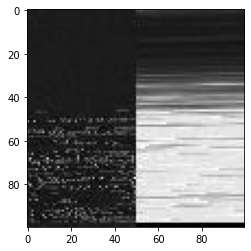

In [ ]:
# 3 channels
images_train_TL = images_train.repeat(3,axis=-1)
images_test_TL = images_test.repeat(3,axis=-1)
images_valid_TL = images_valid.repeat(3,axis=-1)

# visualising
plt.imshow(images_train_TL[0])

In [ ]:
# stretching pixels to 224X224
images_train_TL = np.array([zoom(images_train_TL[i],(2.24,2.24,1)) for i in range(len(images_train_TL))])
images_test_TL = np.array([zoom(images_test_TL[i],(2.24,2.24,1)) for i in range(len(images_test_TL))])
images_valid_TL = np.array([zoom(images_valid_TL[i],(2.24,2.24,1)) for i in range(len(images_valid_TL))])

(2800, 224, 224, 3) (600, 224, 224, 3) (600, 224, 224, 3)


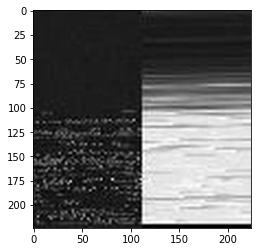

In [ ]:
plt.imshow(images_train_TL[10])
print(images_train_TL.shape,images_test_TL.shape,images_valid_TL.shape)

#### 5.5.2. Model building

In [ ]:
# Instantiating a base model and load pre-trained weights

vgg16 = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [ ]:
# Freezing the layers of the base model 
vgg16.trainable=False
#for layer in vgg16.layers[:-2]:
  #layer.trainable=False

vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Creating a new model that will take the output of VGG16 as its input but first, added a Rescaling layer to meet the VGG16 preprocessing requirements.
tf.keras.backend.clear_session()
TL_vgg16= Sequential([
                      Rescaling(scale=1/127.5,offset=-1,input_shape=(224,224,3)),
                      vgg16,
                      GlobalAveragePooling2D(),
                      Dense(32, activation='relu'),
                      #Dropout(0.1),
                      #BatchNormalization(),
                      Dense(4, activation='softmax')
                      ])
TL_vgg16.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = 0.001),
                  metrics=['Accuracy'])
TL_vgg16.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 14,731,236
Trainable params: 16,548
Non-trainable params: 14,714,688
_______________________________________

Epoch 1/20
88/88 [==============================] - 9s 92ms/step - loss: 1.3848 - Accuracy: 0.2814 - val_loss: 1.3674 - val_Accuracy: 0.2500
Epoch 2/20
88/88 [==============================] - 8s 89ms/step - loss: 1.3550 - Accuracy: 0.3157 - val_loss: 1.3262 - val_Accuracy: 0.3433
Epoch 3/20
88/88 [==============================] - 8s 89ms/step - loss: 1.3178 - Accuracy: 0.3879 - val_loss: 1.2950 - val_Accuracy: 0.4567
Epoch 4/20
88/88 [==============================] - 8s 89ms/step - loss: 1.2785 - Accuracy: 0.4411 - val_loss: 1.2798 - val_Accuracy: 0.3883
Epoch 5/20
88/88 [==============================] - 8s 89ms/step - loss: 1.2465 - Accuracy: 0.4493 - val_loss: 1.2087 - val_Accuracy: 0.5333
Epoch 6/20
88/88 [==============================] - 8s 89ms/step - loss: 1.2026 - Accuracy: 0.4743 - val_loss: 1.1916 - val_Accuracy: 0.4600
Epoch 7/20
88/88 [==============================] - 8s 89ms/step - loss: 1.1689 - Accuracy: 0.4825 - val_loss: 1.1536 - val_Accuracy: 0.4967
Epoch 8/20
88

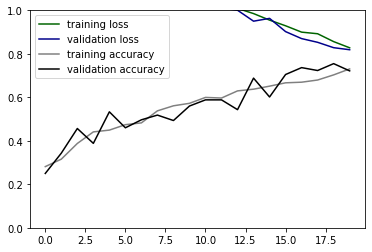

In [ ]:
# Training on our dataset
log = TL_vgg16.fit(images_train_TL, y_train, epochs=20,
                        validation_data=(images_valid_TL, y_valid),
                   batch_size=32)
    
plt.plot(log.history['loss'],label = "training loss",color='darkgreen')
plt.plot(log.history['val_loss'], label = "validation loss",color='darkblue')
plt.plot(log.history['Accuracy'],label = "training accuracy",color='grey')
plt.plot(log.history['val_Accuracy'], label = "validation accuracy",color='black')
plt.legend()
ax = plt.gca()
ax.set_ylim([0, 1])
plt.show()

The model showed a validation accuracy of 0.7217 and the training trajectory seemed upwards while the losses are a little further apart and higher than preferred. Now, examining if unfreezing the two end layers of the base model can make the model learn our data better.

In [ ]:
vgg16.trainable=False
for layer in vgg16.layers[:-2]:
  layer.trainable=False

vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                        

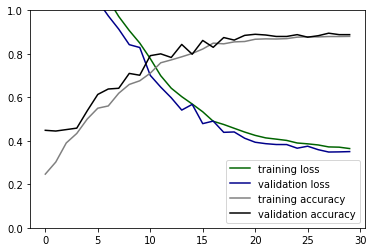

In [ ]:
tf.keras.backend.clear_session()
TL_vgg16= Sequential([
                      Rescaling(scale=1/127.5,offset=-1,input_shape=(224,224,3)),
                      vgg16,
                      GlobalAveragePooling2D(),
                      #Flatten(),
                      #BatchNormalization(),
                      Dense(64, activation='relu'),
                      #Dropout(0.1),
                      #BatchNormalization(),
                      Dense(64, activation='relu'),
                      #Dropout(0.1),
                      #BatchNormalization(),
                      Dense(4, activation='softmax')
                      ])
TL_vgg16.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = 0.001),
                  metrics=['Accuracy'])

TL_vgg16.summary()

tf.keras.backend.clear_session()

def scheduler(epoch, lr):
   if epoch < 10:
    return lr
   else:
    return lr * tf.math.exp(-0.1)

lr_schedule_callback = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)


log = TL_vgg16.fit(images_train_TL, y_train, epochs=30,
                   validation_data=(images_valid_TL, y_valid),
                   batch_size=32,
                   callbacks=[lr_schedule_callback])
    
plt.plot(log.history['loss'],label = "training loss",color='darkgreen')
plt.plot(log.history['val_loss'], label = "validation loss",color='darkblue')
plt.plot(log.history['Accuracy'],label = "training accuracy",color='grey')
plt.plot(log.history['val_Accuracy'], label = "validation accuracy",color='black')
plt.legend()
ax = plt.gca()
ax.set_ylim([0, 1])
plt.show()

After unfreezing the 2 layers, the model has definitely improved learning with a validation accuracy of 0.7967 and a reduced loss. Adding another dense layer helped with the accuracy but the losses seemed to deflect away towards the end. So 30 epochs were used to assess the learning trends from 20th epoch onwards to ascerrtain if the model needed more parameters or longer training. Even after 30 epochs, the accuracy did not improve significantly, which means more parameters may be needed. Despite adding more layers and more units per layer, the learning converges around 0.89. Using Flatten layer instead of GlobalAverage caused fast learning but soon began overfitting, giving unreliable results. Therefore, Batch Normalization and Dropout layers were then used which did not improve the overfitting. Eventually, GlobalAverage was a lot more reliable than Flatten. 

Setting a learning rate schedule rendered a more stable learning processes. There were not any strange dips or hikes in the metrics and the dropouts were also removed without widening the gap between the losses. Mini-batch did not offer considerable improvements here.

Unfreezing the base model and fine tuning all the parameters to fit the structure.

#### 5.5.3. Validation Accuracy: 0.8817

### 5.3. A CNN-RNN architecture

Inspired by the paper, "Combining Convolutional Neural Network With Recursive Neural Network for Blood Cell Image Classification" [available at https://ieeexplore.ieee.org/document/8402091].

This is an attempt to explore how capturing the structural content of mages using CNN and combining that with the RNN's ability to learn associations between inputs. The assumption is that the images that represent the time-series data may also be used to understand whether an image can.

We will take the frozen VGG-16 and update that with end layers with the following configuration:
VGG-16 + Max Pooling + LSTM + Dense 

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
vgg16.trainable=False

In [ ]:
CNN_RNN = Sequential([Rescaling(scale=1/127.5,offset=-1,input_shape=(224,224,3)),
                      vgg16,
                      Conv2D(32, kernel_size=(3)),
                      MaxPooling2D(pool_size=2),
                      Reshape((64,2)),
                      GRU(20, return_sequences=True),
                      GRU(20),
                      Dense(32,activation='relu'),
                      Dense(4, activation='softmax')
                      ])

CNN_RNN.compile(loss="SparseCategoricalCrossentropy",
                  optimizer=Adam(learning_rate = 0.001),
                  metrics=['Accuracy'])

CNN_RNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          147488    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0         
 )                                                               
                                                                 
 reshape (Reshape)           (None, 64, 2)             0         
                                                                 
 gru (GRU)                   (None, 64, 20)            1440      
                                                        


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
88/88 [==============================] - 12s 106ms/step - loss: 1.3225 - Accuracy: 0.3529 - val_loss: 1.1263 - val_Accuracy: 0.4833 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
88/88 [==============================] - 9s 97ms/step - loss: 0.8282 - Accuracy: 0.6579 - val_loss: 0.7423 - val_Accuracy: 0.6617 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
88/88 [==============================] - 9s 97ms/step - loss: 0.5301 - Accuracy: 0.8118 - val_loss: 0.4093 - val_Accuracy: 0.8700 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
88/88 [==============================] - 8s 96ms/step - loss: 0.3758 - Accuracy: 0.8689 - val_loss: 0.3333 - val_Accuracy: 0.8767 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001

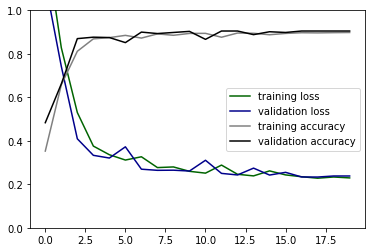

In [ ]:

tf.keras.backend.clear_session()

def scheduler(epoch, lr):
   if epoch < 10:
    return lr
   else:
    return lr * tf.math.exp(-0.1)

lr_schedule_callback = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)


logCNN_RNN = CNN_RNN.fit(images_train_TL, y_train, epochs=20,
                   validation_data=(images_valid_TL, y_valid),
                   batch_size=32,
                   callbacks=[lr_schedule_callback])
    
plt.plot(logCNN_RNN.history['loss'],label = "training loss",color='darkgreen')
plt.plot(logCNN_RNN.history['val_loss'], label = "validation loss",color='darkblue')
plt.plot(logCNN_RNN.history['Accuracy'],label = "training accuracy",color='grey')
plt.plot(logCNN_RNN.history['val_Accuracy'], label = "validation accuracy",color='black')
plt.legend()
ax = plt.gca()
ax.set_ylim([0, 1])
plt.show()

After all the attempts, the accuracy using a CNN-RNN structure is 0.905. However, it trained more smoothly and with fewer interventions as compared to the normal Transfer Learning attempted previously. The convergence is quite linear after the 14th epoch and it stays so until the 20th. 



# Question 6

### 6.1. Final model and comparison

So far all the models have rendered an accuracy around between 0.89-0.91. There have been various attempts to train them more but either the learning stagnates or massive overfitting occurs. There may be other techniques such as attention layers or merging layers to explore further. 

Overall, the best performance has been by the Conv32 model from the paper with a mini-batch, random flipping, amd learning rate scheduler (ModelTry_2 from Qestion4, part 4). The validation accurcy of 0.967 has been consistent across all improvement attempts, but this particular version has been trained keeping the bias vs variance tradeoff in mind - considering the number of units and layers with the regularisation and augmentation methods. This model has also been computationally efficient compared to the Transfer Learning models. The RNN methods have not given the best performance and although Conv1D module has been improved using various attempts, its learning has been more unstable compared to the CNN models used later. 

In [ ]:
FinalModel=modelTRY_2


### 6.2. Final Testing

In [ ]:
#Test + Valid
images_TrainValid = np.vstack((images_train,images_valid))
y_TrainValid = np.vstack((y_train,y_valid))

#Training
FinalModel.fit(images_TrainValid, y_TrainValid, epochs=20)


Epoch 1/20
107/107 [==============================] - 2s 14ms/step - loss: 0.2214 - Accuracy: 0.8965
Epoch 2/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2264 - Accuracy: 0.8968
Epoch 3/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2252 - Accuracy: 0.8988
Epoch 4/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2229 - Accuracy: 0.8968
Epoch 5/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2223 - Accuracy: 0.8982
Epoch 6/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2243 - Accuracy: 0.8979
Epoch 7/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2210 - Accuracy: 0.9003
Epoch 8/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2230 - Accuracy: 0.8953
Epoch 9/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2209 - Accuracy: 0.8974
Epoch 10/20
107/107 [==============================] - 1s 14ms/step - loss: 0.2235 - Accura

In [ ]:
# evaluation
FinalModel.evaluate(images_test,y_test)


19/19 [==============================] - 0s 4ms/step - loss: 0.2079 - Accuracy: 0.9117


[0.20792202651500702, 0.9116666913032532]

In [ ]:
# confusion matrix
y_pred = FinalModel.predict(images_test)
preds_classes = [np.argmax(i) for i in y_pred]
cf_matrix = confusion_matrix(y_test, preds_classes)

In [ ]:
cf_matrix

array([[103,   0,   0,  47],
       [  0, 150,   0,   0],
       [  1,   2, 147,   0],
       [  1,   0,   2, 147]])

In [ ]:
#FinalModel.save('FinalModel.h5')

The model has predicted 91% instances correctly, and 47 instances in which it classified both measures that are faulty as healthy. In this situation  the goal should be to minimise these errors because it can be costly if the system failure is not detected when there is one. 